# Herramientas de AI: probabilidad
## Máster en Inteligencia Artificial Avanzada y Aplicada
En este notebooks vamos a introducir el concepto de probabilidad al mismo tiempo que repasamos los conceptos básicos acerca del uso y representación de datos en Python.  
### Ejemplo de probabilidad (frecuentista): encuesta de helados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#definimos un DataFrame en Pandas con los resultados de la encuesta
encuesta = pd.DataFrame({'chocolate': [100, 350], 'vainilla': [120, 200], 'fresa': [60, 90]}, index = ['hombre', 'mujer'])
encuesta

,chocolate,vainilla,fresa
hombre,100,120,60
mujer,350,200,90


In [3]:
encuesta.loc["hombre"]

chocolate    100
vainilla     120
fresa         60
Name: hombre, dtype: int64

In [5]:
#Podemos sumar las filas para ver totales por columnas
encuesta.sum(axis='index')

chocolate    450
vainilla     320
fresa        150
dtype: int64

In [4]:
#O podemos sumar las columnas para ver totales por filas
encuesta.sum(axis = 1)
##COMPLETAR

hombre    280
mujer     640
dtype: int64

In [6]:
#Totales de la tabla
N = encuesta.sum().sum()
N

920

#### Probabilidad conjunta
La probabilidad de que sucedan dos eventos a la vez.

In [7]:
P = encuesta / N
P

,chocolate,vainilla,fresa
hombre,0.108696,0.130435,0.065217
mujer,0.380435,0.217391,0.097826


Ejemplo, de los 920 participantes de la encuesta, ¿Cuál es la probabilidad de que el participante sea un hombre y prefiera el chocolate, $P(hombre, chocolate)$?

In [8]:
P.loc['hombre', 'chocolate']

0.10869565217391304

¿Cuál es la probabilidad de que el participante sea una mujer y prefiera la vainilla, $P(mujer, vainilla)$?

In [9]:
P.loc["mujer", "vainilla"]

0.21739130434782608

#### Probabilidad marginal
La probabilidad marginal de una probabilidad conjunta se obtiene eliminando el efecto de un evento sobre la probabilidad conjunta (regla de la suma).  

In [10]:
P_sabor = P.sum(axis='index')
P_sabor

chocolate    0.489130
vainilla     0.347826
fresa        0.163043
dtype: float64

Ejemplo: la probabilidad de que un participante cualquiera prefiera el chocolate, $P(chocolate)$, es

In [11]:
P_sabor['chocolate']

0.4891304347826087

Este valor equivale a la suma  $P(hombre, chocolate) + P(mujer, chocolate)$

In [12]:
##COMPROBAR
P.loc["hombre", "chocolate"] + P.loc["mujer", "chocolate"]

0.4891304347826087

In [15]:
#Probabilidad de hombre
P.sum(axis = 1)["hombre"]

0.30434782608695654

#### Probabilidad condicionada
La probabilidad de que suceda un evento dado que ha sucedido otro evento.  
Ejemplo, si sabemos que el participante de la encuesta es un hombre, ¿cuál es la probilidad de que prefiera el chocolate, $P(chocolate|hombre)$?

In [16]:
P_genero = P.sum(axis='columns')
#P(choco|hombre)=P(choco,hombre)/P(hombre)
P_choco_hombre = P.loc['hombre', 'chocolate'] / P_genero['hombre']
P_choco_hombre

0.3571428571428571

In [17]:
#Podemos calcular la probabilidad condicionada por género para cada entrada de la tabla
#dividimos cada columna (sabor) por la P_genero
#convertimos en numpy array para hacer broadcasting
#añdimos una dimensión a P_genero para convertirlo en vector columna

from numpy import newaxis
P_s_g = P.to_numpy() / P_genero.to_numpy()[:,newaxis]
P_s_g

array([[0.35714286, 0.42857143, 0.21428571],
       [0.546875  , 0.3125    , 0.140625  ]])

In [18]:
P_s_g = pd.DataFrame(P_s_g, columns = encuesta.columns, index = encuesta.index)
display(P_s_g)

,chocolate,vainilla,fresa
hombre,0.357143,0.428571,0.214286
mujer,0.546875,0.312500,0.140625


la probabilidad de que siendo mujer le guste la fresa es

In [19]:
P_s_g.loc['mujer', 'fresa']

0.140625

#### Ley de la probabilidad total
Se puede calcular la probabilidad de un evento como la suma de todas sus probabilidades condicionales.  
Ejemplo: la probabilidad de que el participante de la encuesta prefiera el chocolate es la suma:  
$P(chocolate|hombre) \times P(hombre) + P(chocolate|mujer) \times P(mujer)$  

In [ ]:
P_choco_mujer = #COMPLETAR

P_choco = P_choco_hombre * P_genero['hombre'] + P_choco_mujer * P_genero['mujer']
P_choco

In [ ]:
#La probabilidad total de cada sabor se puede calcular con el producto matricial
# P_genero x P_sabor_genero
P_genero.to_numpy().dot(P_s_g)

#### Independencia
Dos eventos son independientes si $P(A, B) = P(A) \cdot P(B)$   
¿se cumple para los datos de la encuesta?

In [ ]:
assert(P.loc['hombre', 'chocolate'] == P_choco * P_genero['hombre'])

In [ ]:
P.loc['hombre', 'chocolate']

In [ ]:
P_choco * P_genero['hombre']

## Ejemplo práctico
### Dataset 'Titanic'
Vamos a utilizar un listado de pasajeros del Titanic para estudiar probabilidades de supervivencia de los pasajeros en función de su género y su clase. 
Primero cargamos los datos en Pandas.  

In [35]:
#Cargamos el dataset
titanic = pd.read_csv("titanic.csv")

In [38]:
titanic.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    object 
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.6+ KB


In [36]:
#Mostramos primeras columnas como ejemplo
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [39]:
#Convertimos columna 'Pclass' a cadena de texto
titanic['Pclass'] = titanic['Pclass'].astype('str')

Para calcular las probabilidades necesitamos obtener la tabla de frecuencias de cada combinación (supervicencia, clase, género)

In [40]:
#Tabla de contingencia: nº de pasajeros por clase y sexo
pd.crosstab(index=titanic['Pclass'], columns=titanic['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,343


In [41]:
#Tabla de contingencia: supervivientes por clase y sexo
titanic_frec = pd.crosstab(index=titanic['Survived'], columns=[titanic['Sex'],titanic['Pclass']])
titanic_frec

Sex      female         male         
Pclass        1   2   3    1   2    3
Survived                             
0             3   6  72   77  91  296
1            91  70  72   45  17   47

In [73]:
titanic_frec.columns

MultiIndex([(&#39;female&#39;, &#39;1&#39;),
            (&#39;female&#39;, &#39;2&#39;),
            (&#39;female&#39;, &#39;3&#39;),
            (  &#39;male&#39;, &#39;1&#39;),
            (  &#39;male&#39;, &#39;2&#39;),
            (  &#39;male&#39;, &#39;3&#39;)],
           names=[&#39;Sex&#39;, &#39;Pclass&#39;])

### Ejercicio  
Calcula las probabilidades condicionales siguientes:  
 * $P(Survived=True|Género=male)$ 
 * $P(Survived=True|Género=female)$ 
 * $P(Survived=True|Género=male, Clase=1)$  
 * $P(Survived=True|Género=male, Clase=2)$  
 * $P(Survived=True|Género=male, Clase=3)$  
 * $P(Survived=True|Género=female, Clase=1)$  
 * $P(Survived=True|Género=female, Clase=2)$  
 * $P(Survived=True|Género=female, Clase=3)$  

In [77]:
#Solución
#COMPLETAR
P_S_cond_male = titanic_frec["male"].loc[1].sum() / (titanic_frec["male"].sum().sum())
P_S_cond_male

0.19022687609075042

In [84]:
titanic_frec.xs('1', axis = 1, level = "Pclass")

Sex,female,male
Survived,,
0,3,77
1,91,45


In [95]:
P_S_cond_1 = titanic_frec.xs('1', axis = 1, level = "Pclass").loc[1].sum() / titanic_frec.xs('1', axis = 1, level = "Pclass").sum().sum()

P_S_cond_1

0.6296296296296297

In [97]:
titanic_frec

Sex      female         male         
Pclass        1   2   3    1   2    3
Survived                             
0             3   6  72   77  91  296
1            91  70  72   45  17   47

In [100]:
#Probabilidad de supervivencia siendo hombre y viajando en clase 1
#P(S|male, 1) = P(S n male n 1) / P(male n 1)

P_S_male_1 = titanic_frec[("male", "1")].loc[1].sum()
P_m_1 = titanic_frec[("male", "1")].sum().sum()

P_S_cond_male_1 = P_S_male_1 / P_m_1
P_S_cond_male_1

0.36885245901639346

In [101]:
P_S_female_1 = titanic_frec[("female", "1")].loc[1].sum()
P_m_1 = titanic_frec[("female", "1")].sum().sum()

P_S_cond_female_1 = P_S_male_1 / P_m_1
P_S_cond_female_1

0.4787234042553192

## Teorema de Bayes
### Ejercicio práctico: sistema de diagnóstico de Meningitis  
* La meningitis causa rigidez de cuello en un 50% de los casos: $P(S|M)=0.5$    
* se conoce también la probabilidad a priori de que un paciente tenga meningitis: $P(M)=1/50000$    
* se conoce la probabilidad a priori de que un paciente tenga rigidez de cuello $P(S)=1/20$    

Por tanto podemos calcular $P(M|S)$ (probabilidad de que un paciente con rigidez de cuello sufra una meningitis

In [20]:
pM = 1/50000
pS = 1/20
pS_M = 0.5

#teorema de Bayes
pM_S = (pS_M*pM) / pS

In [21]:
#probabilidad a priori de tener meningitis
pM

2e-05

In [22]:
#probabilidad a posteriori de tener meningitis
pM_S

0.0002

In [23]:
#la probabilidad de tener meningitis si se tiene rigidez de cuello aumenta 10 veces
pM_S / pM

10.0

Ahora evaluamos cómo varía $P(M|S)$ cuando varía $P(S)$   

In [24]:
pSarray = np.arange(start=1/20, stop=1, step=1/20)
pM_Sarray = [pS_M*pM/pS for pS in pSarray]

pM_Sarray

[0.0002,
 0.0001,
 6.666666666666666e-05,
 5e-05,
 4e-05,
 3.3333333333333335e-05,
 2.857142857142857e-05,
 2.5e-05,
 2.2222222222222223e-05,
 2e-05,
 1.8181818181818182e-05,
 1.6666666666666664e-05,
 1.5384615384615384e-05,
 1.4285714285714285e-05,
 1.3333333333333333e-05,
 1.25e-05,
 1.176470588235294e-05,
 1.111111111111111e-05,
 1.0526315789473684e-05]

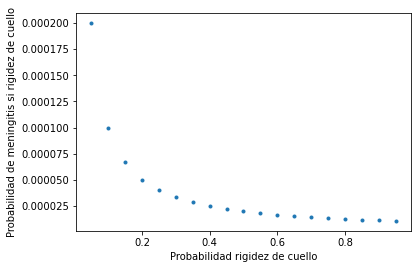

In [33]:
#Representa gráficamente
plt.figure()
plt.plot(pSarray,pM_Sarray, '.')
plt.xlabel("Probabilidad rigidez de cuello")
plt.ylabel("Probabilidad de meningitis si rigidez de cuello")
plt.show()

Cuando más probable es el síntoma, menos informativo es para nuestros propósitos

## Variables aleatorias
Una variable aleatoria es una variable que toma valores numéricos de un fenómeno aleatorio. Las variables aleatorias pueden ser `discretas` o `continuas`.  
### Variables discretas
Suponemos que tenemos una población con los números enteros del 1 al 6 (por ejemplo al lanzar un dado de 6 caras).  

In [2]:
np.random.seed(1234)
x=np.arange(6)+1

x

array([1, 2, 3, 4, 5, 6])

In [3]:
#Permutación de la población
np.random.shuffle(x) #Ojo, no devuelve un array sino que modifica el original
x

array([3, 2, 6, 1, 5, 4])

In [4]:
#otra manera
np.random.permutation(x) #devuelve un array con las permutaciones

array([3, 5, 1, 6, 4, 2])

In [5]:
#última manera
np.random.permutation(6)+1 #genera un array de [0...5] y lo permuta

array([2, 1, 4, 3, 6, 5])

In [ ]:
#muestreo de la población
np.random.choice(x, 3, replace=False)

In [ ]:
#muestreo con repetición
np.random.choice(x, 10, replace=True)

In [ ]:
#repetición del experimento 10 veces
np.array([np.random.choice(x, 3, replace=True) for i in range(10)])

## Distribuciones de probabilidad

La distribución de probabilidad (PDF de sus siglas en inglés) de una variable discreta es una lista de las probabilidades asociadas a cada valor posible.  
La función de distribución acumulativa (CDF) es una función de la probabilidad de que un variable aleatoria X sea menor o igual que x para cada x.  
En Python, podemos obtener las funciones de distribución en el paquete `numpy.random.Generator` (https://numpy.org/doc/stable/reference/random/generator.html).  

### Distribución uniforme
Lo podemos obtener con `np.random.Generator.uniform`


In [7]:
size = 1000
s = np.random.default_rng().uniform(size=size)

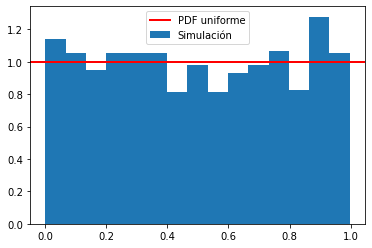

In [8]:
count, bins, ignored = plt.hist(s, 15, density=True, label='Simulación')
plt.axhline(y=1, linewidth=2, color='r', label='PDF uniforme')
plt.legend()
plt.show()

### Distribución normal
Lo podemos obtener con `np.random.Generator.normal`


In [9]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.default_rng().normal(mu, sigma, size)

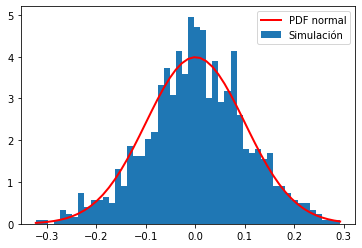

In [10]:
from scipy.stats import norm
count, bins, ignored = plt.hist(s, 50, density=True, label='Simulación')
plt.plot(bins, norm.pdf(bins, mu, sigma), linewidth=2, color='r', label='PDF normal')
plt.legend()
plt.show()

### Distribución binomial
P. ej. si la probabilidad de que suceda un evento es p=0.3 y repetimos el evento 10 veces, ¿cuál es la probabilidad de que suceda el evento $x$ veces ( $PDF(x, n=10, p=0,3)$ )?  
Lo simulamos con `np.random.default_rng().binomial`

In [11]:
from scipy.stats import binom
n = 10
p = 0.3
s = np.random.default_rng().binomial(n, p, size)

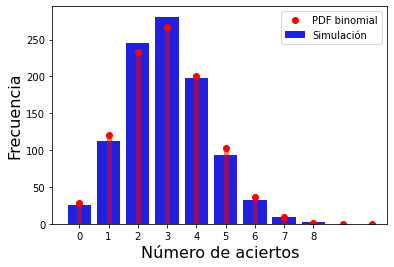

In [12]:
fig, ax = plt.subplots()
ax = sns.countplot(s, label='Simulación', color='b')
ax.set_xlabel("Número de aciertos",fontsize=16)
ax.set_ylabel("Frecuencia",fontsize=16)
x = range(n+1)
ax.plot(x, binom.pmf(x, n, p)*size, 'ro', label='PDF binomial')
ax.vlines(x, 0, binom.pmf(x, n, p)*size, colors='r', lw=5, alpha=0.5)
plt.legend()
plt.show()

#### Ejemplo
Si realizamos un cuestionario con n=15 preguntas con 4 opciones cada respuesta, y la persona que realiza la prueba responde al azar, ¿Cuál es la nota esperada? ¿Y si penalizamos con 1/4 la respuesta equivocada?

In [13]:
#Solución: sin penalización
n = 15
p = 1/4
#la probabilidad de acertar x preguntas sigue una distribución binomial
x = range(n+1)
p_x = binom.pmf(x, n, p)

In [14]:
#Representa la probabilidad de cada nota

In [15]:
#la nota esperada es la suma de cada x por su probabilidad (sobre 15 ptos)
nota_esperada = np.sum(x*p_x)
nota_esperada/15*10

2.500000000000008

In [16]:
#Solución: con penalización

#si acierta x preguntas, falla n-x preguntas con una penalización de -1/4
nota_esperada = np.sum(x*p_x) - np.sum((np.ones(n+1)*n-x)*p_x*1/4)
nota_esperada/15*10

0.6250000000000016

In [18]:
#Considerando penalización, cuál es la probabilidad de sacar al menos un 3


0.5387131236493583

### Distribución multinomial
Es una generalización de la distribución binomial, en la que cada experimento puede tomar un valor de entre  $p$  valores posibles.  
Ejemplo: si lanzamos un dado (equilibrado) 20 veces, ¿cuántas veces sale cada valor?

In [19]:
veces = 20
p = [1/6]*6
s = np.random.default_rng().multinomial(veces, p, size=1)
s

array([[5, 2, 1, 6, 4, 2]], dtype=int64)

In [20]:
np.sum(s)

20

Si repetimos el experimento muchas veces, dado que la probabilidad es igual para todo los lados, la tendencia es a tener una distribución uniforme de valores

In [21]:
s = np.random.default_rng().multinomial(veces, p, size=1000)
np.mean(s, axis=0)

array([3.318, 3.352, 3.319, 3.257, 3.383, 3.371])

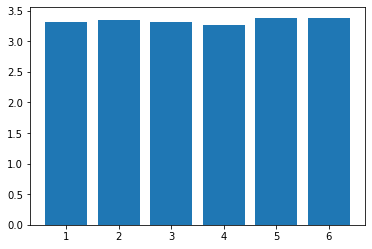

In [22]:
plt.bar(x=np.arange(6)+1, height=np.mean(s, axis=0))
plt.show()

In [23]:
np.sum(np.mean(s, axis=0))

20.0

### Distribución de Poisson
Es una generalización de la distribución binomial para valores grandes de N.  
Ejemplo: nº de coches que pasan por una carretera en 1 hora para una estimación de 100 coches/hora

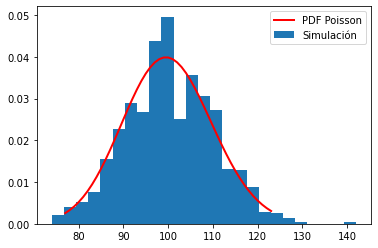

In [24]:
from scipy.stats import poisson

lam = 100
s = np.random.default_rng().poisson(lam, size=1000) #simulamos 1000 horas
count, bins, ignored = plt.hist(s, 25, density=True, label='Simulación')
x = np.arange(poisson.ppf(0.01, lam),
               poisson.ppf(0.99, lam))
plt.plot(x, poisson.pmf(x, lam), linewidth=2, color='r', label='PDF Poisson')
plt.legend()
plt.show()

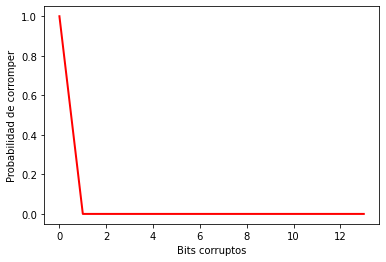

In [29]:
#Transmitimos n = 10^4 bits por un canal que tiene una probabilidad de corrupción de p = 10^-6.
#¿Cuál es la probabilidad de que el mensaje llegue sin error?

n = 10^4
p = 10 ** (-6)
lam = n*p #Tasa de error

x = np.arange(n)
plt.plot(x, poisson.pmf(x, lam), linewidth=2, color='r', label='PDF Poisson')
plt.xlabel("Bits corruptos")
plt.ylabel("Probabilidad de corromper")
plt.show()

## Método de Monte Carlo
Vamos a calcular las probabilidades de ganar en el juego de Monty Hall según se cambie o no la puerta mediante simulación.

In [30]:
#Monty Hall (esto lo pondremos al final)
def juego(cambio):
    """Calcula la probabilidad de ganar en el juego de Monty Hall
    en función de si cambiamos (cambio=1) o no la puerta"""
    P = np.arange(3) #puertas posibles
    E = np.random.choice(3, 1) #puerta elegida
    C = np.random.choice(3, 1) #puerta con el coche, sucesos independientes
    Monty = np.random.choice(np.setdiff1d(P, np.union1d(E, C)), 1) #selección de Monty
    E = E if cambio==0 else np.setdiff1d(P, np.union1d(E, Monty)) #elección final
    
    return(E==C)

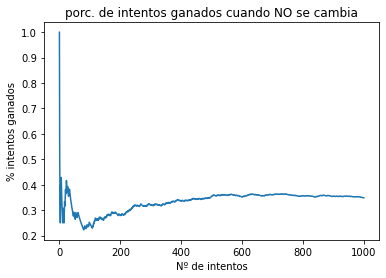

Gana un 34.90% de las veces


In [33]:
N = 1000
ganados = [juego(0) for i in range(N)]
p_ganar = np.sum(ganados) / N

plt.plot(np.cumsum(ganados)/(np.arange(N)+1))
plt.xlabel('Nº de intentos')
plt.ylabel('% intentos ganados')
plt.title('porc. de intentos ganados cuando NO se cambia')
plt.show()
print(f'Gana un {p_ganar*100:.2f}% de las veces')

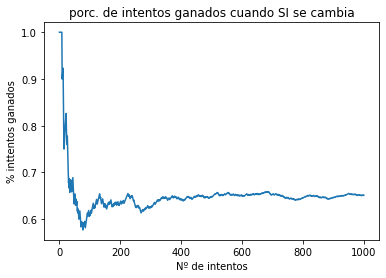

Gana un 65.10% de las veces


In [32]:
N = 1000
ganados = [juego(1) for i in range(N)]
p_ganar = np.sum(ganados) / N

plt.plot(np.cumsum(ganados)/(np.arange(N)+1))
plt.xlabel('Nº de intentos')
plt.ylabel('% inttentos ganados')
plt.title('porc. de intentos ganados cuando SI se cambia')
plt.show()
print(f'Gana un {p_ganar*100:.2f}% de las veces')

### Estimación del valor de Pi
Suponemos que tenemos un círculo de radio $r=1$ dentro de un cuadrado del mismo tamaño. Sabiendo que el área de un círculo tiene el valor $A=\pi \times r^2$,  lanzamos aleatoriamente dardos en toda la superficie del cuadrado, la proporción $p$ de dardos que quedan dentro del cículo deben de ser:
$p=\frac{\pi \times r^2}{(2r)^2}=\frac{\pi}{4}$   
Luego:
$\pi=p \times 4$  

In [34]:
import random as r
import math as m

# Número de dardos que caen dentro del círculo.
inside = 0
# Número total de dardos lanzados.
total = 1000

# Iteramos para el total de dardos.
for i in range(0, total):
  # Generamos posición del dardo (x, y) en el rango [0, 1] con una distr. uniforme
  
    x = r.random()
    y = r.random()
  # Incrementamos el contador si el dardo cae dentro.
    if m.sqrt(x**2 + y**2) < 1.0:
        inside += 1

# dentro / total = pi / 4
pi = (float(inside) / total) * 4
print(pi)

3.132


In [55]:
#Versión vectorizada con numPy
n = 1000000
puntos = np.random.rand(n,2)*2 - 1
resultado = (np.linalg.norm(puntos, axis = 1)) < 1
pi = sum(resultado)/n * 4
pi

3.142624

### Ejercicio
Analizar cómo mejora la precisión de la estimación de $\pi$ al aumentar el nº de dardos en la simulación.  
Para eso hay que crear una función que calcule la estimación de $\pi$ en función del nº de dardos (N) y hacer un barrido de N

In [57]:
#Mejora de la precisión de la simulación con el número de dardos
def calcula_pi(total):
    n = total
    puntos = np.random.rand(n,2)*2 - 1
    resultado = (np.linalg.norm(puntos, axis = 1)) < 1
    pi = sum(resultado)/n * 4
    
    return(pi)

N = 1000
pi_estimado = [calcula_pi(i+1) for i in range(N)]

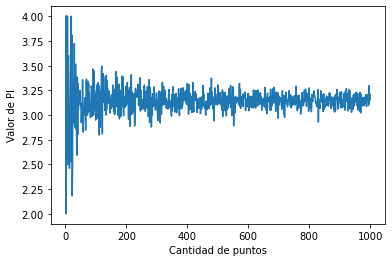

In [61]:
#Representa gráficamente
plt.plot(np.arange(1,N+1), pi_estimado)
plt.xlabel("Cantidad de puntos")
plt.ylabel("Valor de PI")
plt.show()

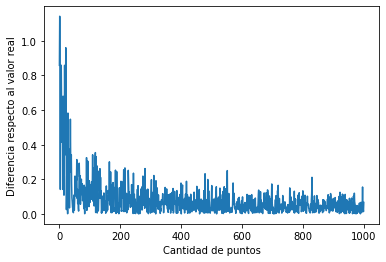

In [68]:
#Representa gráficamente
plt.plot(np.abs(np.array(pi_estimado)-np.pi))
plt.xlabel("Cantidad de puntos")
plt.ylabel("Diferencia respecto al valor real")
plt.show()

### Ejercicios

#### Cumpleaños
Probabilidad de que, en un grupo de N personas, dos personas cumplan años el mismo día.

In [79]:
N = 40
repes = []
for n in range(10000):
    cumpleaños = np.random.randint(1, 366, size = N)
    repetidos = len(cumpleaños) - len(np.unique(cumpleaños))
    repes.append(repetidos)
np.mean(repes)
# prob = repetidos / len(cumpleaños)
# prob

2.0674